In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [275]:
df = pd.read_csv('train.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [166]:
df.duplicated().sum()

0

In [167]:
df.shape

(3390, 17)

In [168]:
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [170]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

## Value Count

In [171]:
# Using value_count to count uniques values in column
df.TenYearCHD.value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [172]:
## Checking for missing values

In [173]:
# Check for missing values
print(df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


## Age column

In [174]:
# Finding the minimum age
min_age = df.age.min()
print(f'The minimum age is: {min_age}')

The minimum age is: 32


In [175]:
# Finding the maximum age
max_age = df.age.max()
print(f'The maximun age is: {max_age}')

The maximun age is: 70


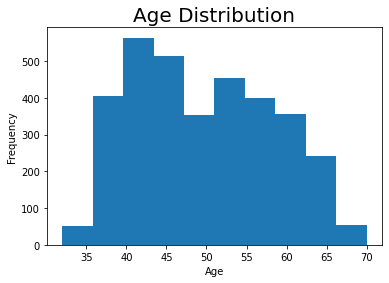

In [176]:
# Ploting a hist plot of the age column
df["age"].plot(kind="hist")
plt.xlabel(xlabel="Age")
plt.title("Age Distribution", fontsize = 20)
plt.show()

## Target column

In [177]:
# Using value_count to count uniques values in column
df.TenYearCHD.value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

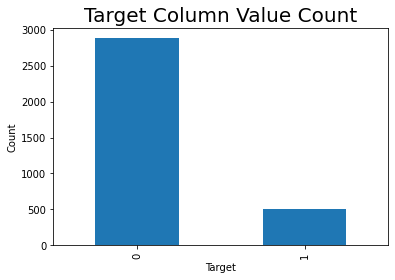

In [178]:
# Plotting the value count
df.TenYearCHD.value_counts().plot(kind= "bar")
plt.title("Target Column Value Count", fontsize = 20)
plt.xlabel(xlabel= "Target")
plt.ylabel(ylabel= "Count")
plt.show()

In [179]:
# Creating a copy of the DataFrame
df_2 = df.copy()

## Droping rows of missing values

In [180]:
# Dropping rows
df_2 = df_2.dropna(axis=0)

# Checking for null values in the DataFrame
df_2.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [181]:
df_2.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [202]:
numeric_dtype_columns = []

for column, values in df_2.items():
    if values.dtypes != "object":
        numeric_dtype_columns.append(column)

numeric_dtype_columns

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [203]:
# Returning all columns with numeric dtypes
numeric_dtype_columns = []
for column, values in df_2.items():
    if values.dtypes != "object":
        numeric_dtype_columns.append(column)

# Function to return a count of outliers in each column
def count_outliers_in_columns(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df[columns] < (Q1 - 1.5*IQR)) | (df[columns] > (Q3 + 1.5*IQR)))]
    return outliers[columns].count()

count_outliers_in_columns(df_2, numeric_dtype_columns)

id                   0
age                  0
education            0
cigsPerDay           7
BPMeds              88
prevalentStroke     18
prevalentHyp         0
diabetes            79
totChol             34
sysBP               90
diaBP               50
BMI                 72
heartRate           56
glucose            146
TenYearCHD         444
dtype: int64

## Finding Outliers

In [92]:
from scipy import stats

# detect outliers using z-score method
df3 = df_2.drop(columns=["sex", "is_smoking"])

z = np.abs(stats.zscore(df3))
outliers = (z > 3).sum(axis=0)

# create a DataFrame to hold the outlier count for each column
outlier_df = pd.DataFrame({'column': df3.columns, 'outlier_count': outliers})

outlier_df

,column,outlier_count
id,id,0
age,age,0
education,education,0
cigsPerDay,cigsPerDay,13
BPMeds,BPMeds,79
prevalentStroke,prevalentStroke,17
prevalentHyp,prevalentHyp,0
diabetes,diabetes,71
totChol,totChol,17
sysBP,sysBP,34


In [42]:
df_2.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

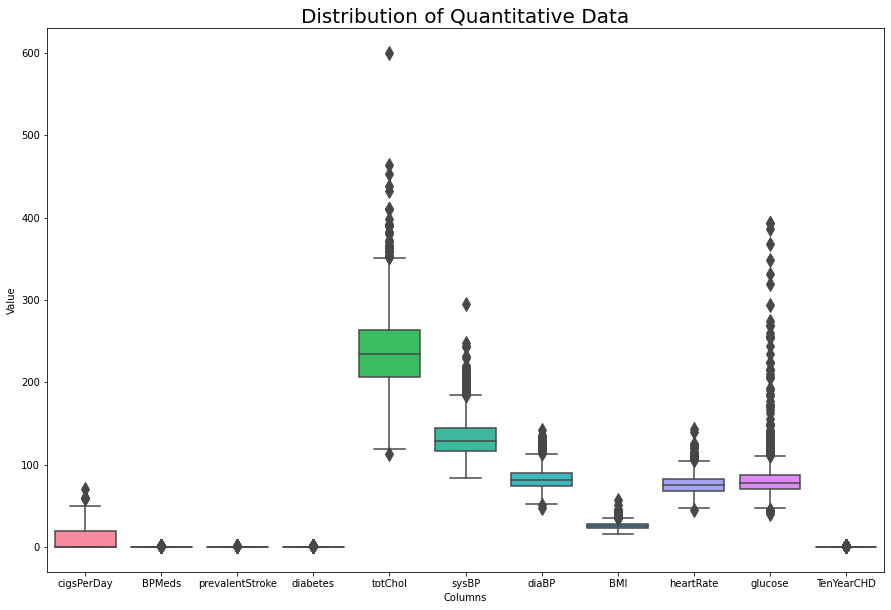

In [43]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=df_2.drop(columns=(['id','age','education','prevalentHyp', 'sex', 
                                 'is_smoking']), inplace= False),
            saturation=0.95,
            fliersize=10,
            whis=1.5,
            width=0.8)

plt.xlabel(xlabel= "Columns")
plt.ylabel(ylabel = "Value")
plt.title("Distribution of Quantitative Data", fontsize= 20)
plt.show()

In [204]:
# Checking the shape before dropping outliers
df_2.shape

(2927, 17)

In [205]:
# Dropping outliers in a column
Q1 = df_2.BMI.quantile(0.25)
Q3 = df_2.BMI.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dropping the outliers in a column
df_2 = df_2[(df_2.BMI > lower_bound) & (df_2.BMI < upper_bound)]
df_2.shape

(2855, 17)

## Creating a smoking

In [208]:
pd.crosstab(df_2.is_smoking, df.TenYearCHD)

TenYearCHD,0,1
is_smoking,,
NO,1236,198
YES,1192,229


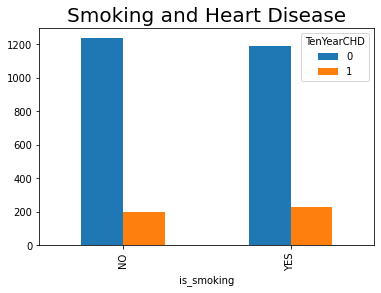

In [209]:
pd.crosstab(df_2.is_smoking, df.TenYearCHD).plot(kind="bar")
plt.title("Smoking and Heart Disease", fontsize = 20)
plt.show()

In [210]:
df_2.sex.value_counts()

sex
F    1561
M    1294
Name: count, dtype: int64

In [211]:
pd.crosstab(df_2.sex, df_2.TenYearCHD)

TenYearCHD,0,1
sex,,
F,1374,187
M,1054,240


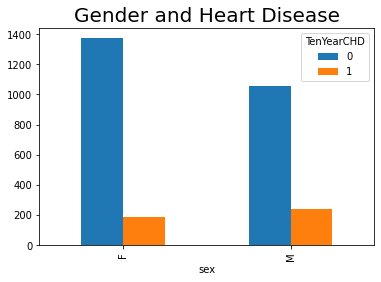

In [212]:
pd.crosstab(df_2.sex, df_2.TenYearCHD).plot(kind='bar')
plt.title("Gender and Heart Disease", fontsize = 20)
plt.show()

## Scatter Plots

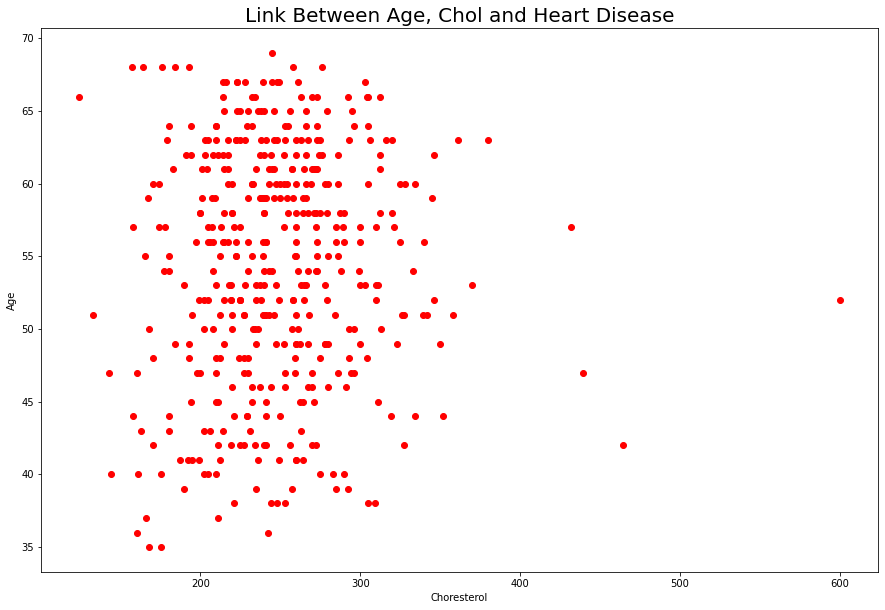

In [213]:
plt.subplots(figsize=(15,10))
plt.scatter(df_2.totChol[df_2.TenYearCHD==1],
            df_2.age[df.TenYearCHD==1], c= "red")
    
    

plt.xlabel(xlabel ="Choresterol")
plt.ylabel(ylabel ="Age")
plt.title("Link Between Age, Chol and Heart Disease", fontsize= 20)
plt.show()

In [214]:
df_2.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

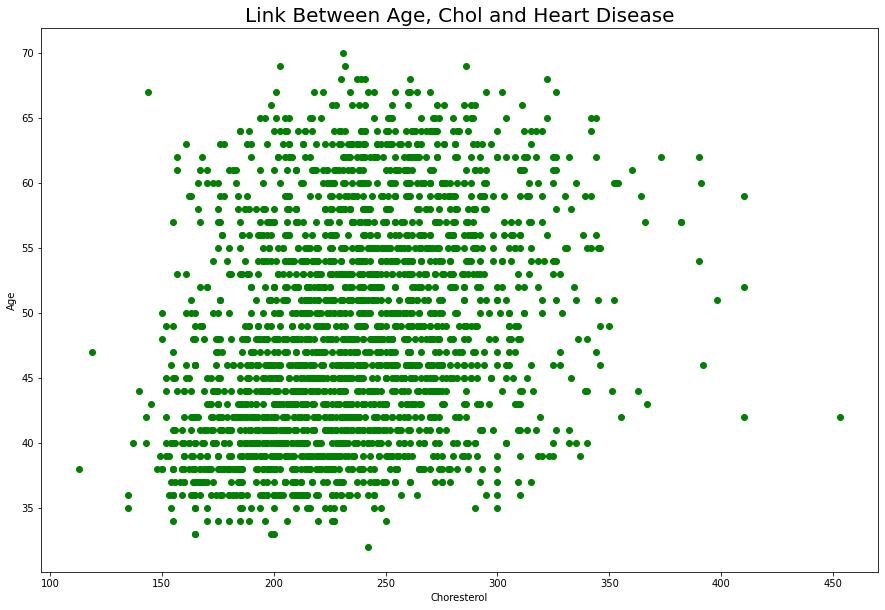

In [215]:
plt.subplots(figsize=(15,10))
plt.scatter(df_2.totChol[df_2.TenYearCHD==0],
            df_2.age[df_2.TenYearCHD==0], c= "green")
    
    

plt.xlabel(xlabel ="Choresterol")
plt.ylabel(ylabel ="Age")
plt.title("Link Between Age, Chol and Heart Disease", fontsize= 20)
plt.show()

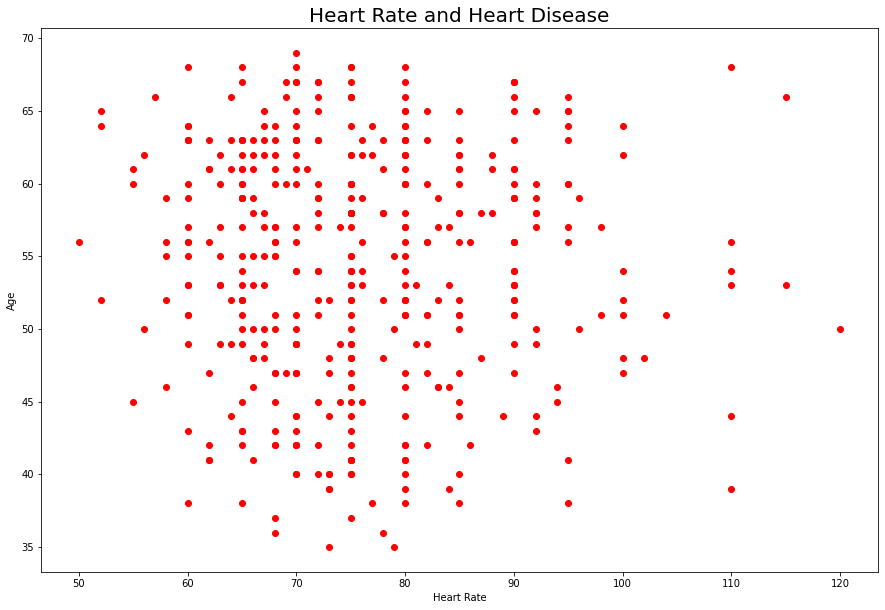

In [216]:
plt.subplots(figsize=(15,10))
plt.scatter(df_2.heartRate[df_2.TenYearCHD==1],
            df_2.age[df_2.TenYearCHD==1], c= "red")


plt.xlabel(xlabel ="Heart Rate")
plt.ylabel(ylabel ="Age")
plt.title("Heart Rate and Heart Disease", fontsize = 20)
plt.show()

In [217]:
pd.crosstab(df_2.education, df_2.TenYearCHD)

TenYearCHD,0,1
education,,
1.0,971,216
2.0,756,107
3.0,424,60
4.0,277,44


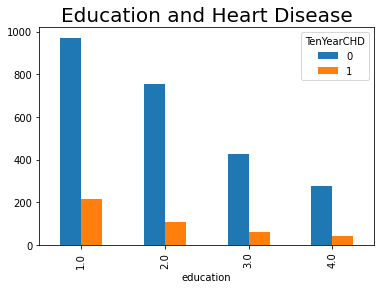

In [218]:
pd.crosstab(df_2.education, df_2.TenYearCHD).plot(kind='bar')
plt.title("Education and Heart Disease", fontsize = 20)
plt.show()

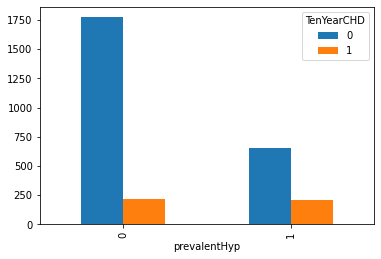

In [219]:
pd.crosstab(df_2.prevalentHyp,df_2.TenYearCHD).plot(kind="bar", 
                                               stacked = False)
plt.show()

In [220]:
df_2.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Heat Map

In [221]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_2['sex'] = le.fit_transform(df_2['sex'])
df_2['is_smoking'] = le.fit_transform(df_2['is_smoking'])
df_2.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


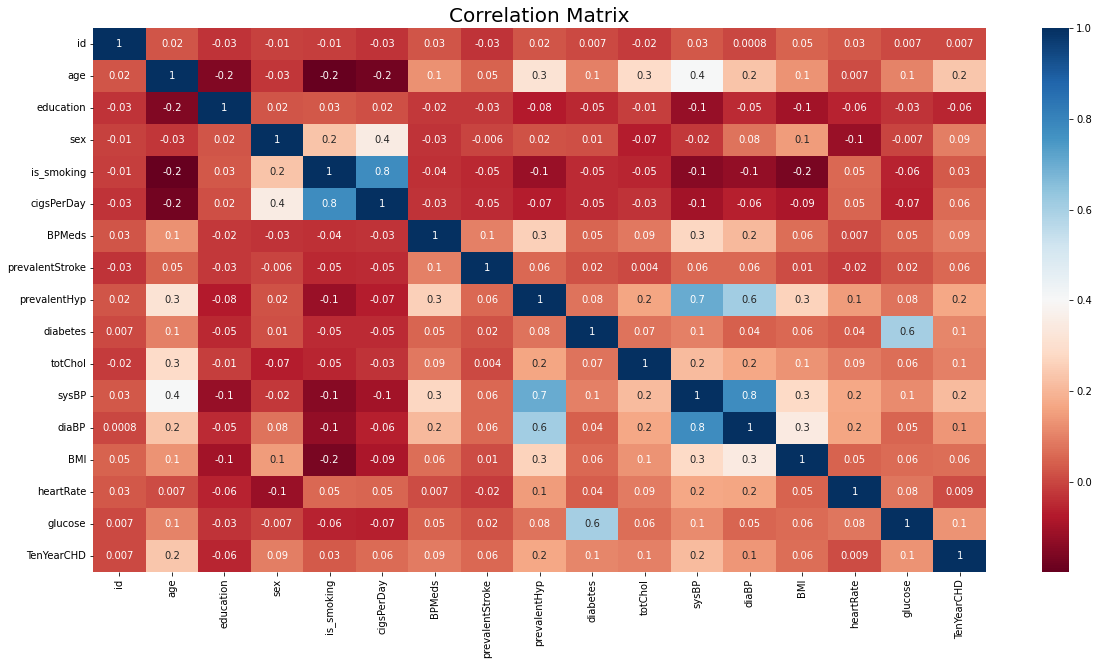

In [222]:
# Calculate the correlation matrix
corr = df_2.corr()

# Plot the heatmap of the correlation matrix
plt.subplots(figsize=(20,10))
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu",
           fmt='.0g',
            vmax=1, 
            )
plt.title("Correlation Matrix",fontsize = 20)
plt.show()

In [223]:
# Checking DataFrame
df_2.shape

(2855, 17)

In [224]:
# Separate target column from DataFrame
y = df_2["TenYearCHD"]

# Feature columns without target column
X = df_2.drop(columns=["TenYearCHD"])

In [225]:
X.shape, y.shape

((2855, 16), (2855,))

In [226]:
X.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0


## Training Classifier using LogisticRegression

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
score_on_test_data = clf.score(X_test, y_test)

print(f'Test data accuracy: {score_on_test_data*100:.2f}%')

Test data accuracy: 85.81%


## Using RandomizedSearchCV to Improve our Results.

In [231]:
from sklearn.model_selection import RandomizedSearchCV


distributions = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'max_iter' : range(100, 800),
    'warm_start' : [True, False],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag'],
    'C' : np.logspace(-1, 1, 22)
}


clf = RandomizedSearchCV(estimator = LogisticRegression(),
                                   param_distributions = distributions,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 42,)

# Fit the data with RandomizedSearchCV
clf.fit(X_train, y_train)


# Getting the best hyperparameters
best_params = clf.best_params_

# Instantiating the model using the best score
clf_best_dt = LogisticRegression(**best_params)

# Using the best params to fit the classifier
clf_best_dt.fit(X_train, y_train)

# Getting accuracy score
accuracy_score = clf_best_dt.score(X_test, y_test)

print(f'Test data accuracy: {accuracy_score*100:.2f}%')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test data accuracy: 85.99%


## Creating a confusion Matrix

In [232]:
from sklearn import metrics

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
cnf_matrix

array([[486,   6],
       [ 74,   5]], dtype=int64)

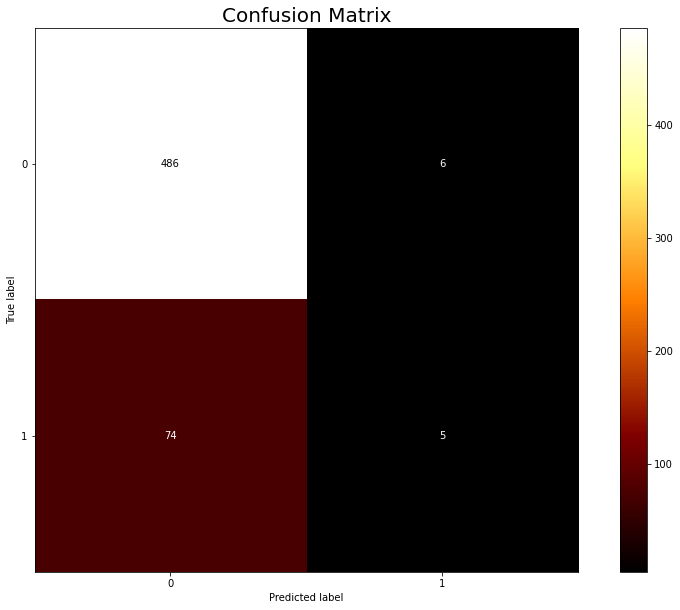

In [233]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicting out on test data
y_pred = clf_best_dt.predict(X_test)


disp = ConfusionMatrixDisplay.from_predictions( y_test, y_pred,
                                               cmap=plt.cm.afmhot,
                       display_labels = clf_best_dt.classes_)

fig = disp.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(10)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

## Roc Curve and AUC

In [234]:
from sklearn.metrics import roc_curve, roc_auc_score

# Using proba to get class probalities
y_predict=clf_best_dt.predict_proba(X_test)[:,1]

# Calculating AUC
auc_score = roc_auc_score(y_test, y_predict)
print(f'AUC: {auc_score:.2f}%')

AUC: 0.73%


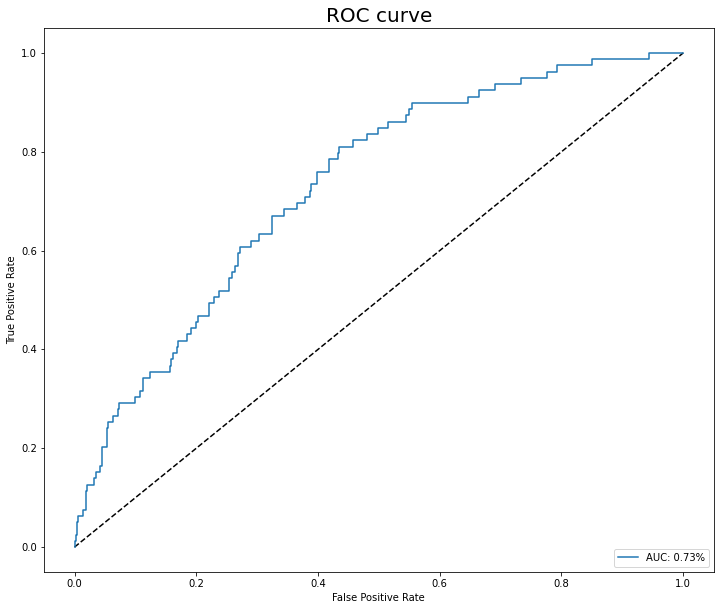

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(12,10))
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr, label=f'AUC: {auc_score:.2f}%')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve', fontsize= 20)
plt.legend(loc ='lower right')
plt.show()

In [236]:
from sklearn.metrics import classification_report

# Target names
names = ['No Risk of Heart Disease', 'Risk of Heart Disease']
print(classification_report(y_test, y_pred, target_names=names))

                          precision    recall  f1-score   support

No Risk of Heart Disease       0.87      0.99      0.92       492
   Risk of Heart Disease       0.45      0.06      0.11        79

                accuracy                           0.86       571
               macro avg       0.66      0.53      0.52       571
            weighted avg       0.81      0.86      0.81       571



In [194]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=12, 
                             random_state=3, 
                             n_estimators=120
                            )

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(f'Test data accuracy: {score*100:.2f}%')

Test data accuracy: 86.16%


In [195]:
plt.plot(n_neighbors, scores, label= "Test_score")
plt.plot(n_neighbors, train_results, label = "Train score")
plt.show()

NameError: name 'n_neighbors' is not defined

## Handling Imbalance data

In [237]:
from imblearn.over_sampling import RandomOverSampler

# Instantianting sampler
ros = RandomOverSampler(random_state=24)
# Creating X and y samples
X_res, y_res = ros.fit_resample(X, y)

In [238]:
# Counting y values
y_res.value_counts()

TenYearCHD
0    2428
1    2428
Name: count, dtype: int64

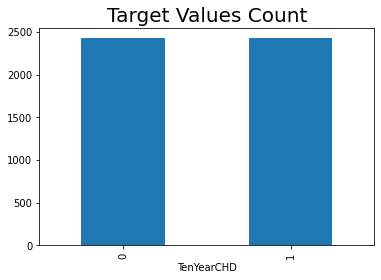

In [239]:
y_res.value_counts().plot(kind='bar')
plt.title("Target Values Count", fontsize= 20)
plt.show()

In [266]:
from sklearn.ensemble import RandomForestClassifier


# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.2, 
                                                    random_state=42)

# instantianting the classifier
clf_balanced = RandomForestClassifier(random_state=0)

# Fitting the data
clf_balanced.fit(X_train, y_train)

# Getting accuracy score
accuracy_score = clf_balanced.score(X_test, y_test)
print(f'Test data accuracy: {accuracy_score*100:.2f}%')

Test data accuracy: 97.84%


## Roc Curve and AUC¶

In [267]:
from sklearn.metrics import roc_curve, roc_auc_score

# Using proba to get class probalities
y_predict=clf_balanced.predict(X_test)

# Calculating AUC
auc_score = roc_auc_score(y_test, y_predict)
print(f'AUC: {auc_score:.2f}%')

AUC: 0.98%


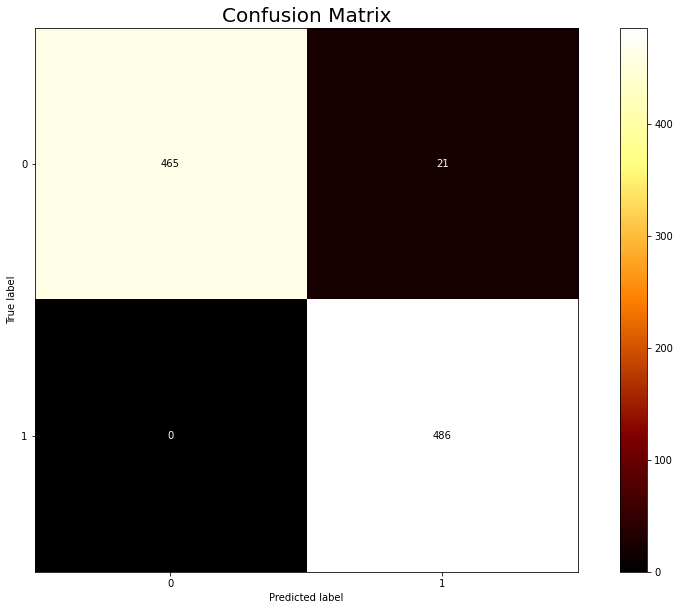

In [268]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicting out on test data
y_pred = clf_balanced.predict(X_test)


disp = ConfusionMatrixDisplay.from_predictions( y_test, y_pred,
                                               cmap=plt.cm.afmhot,
                       display_labels = clf_best_dt.classes_)

fig = disp.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(10)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

In [269]:
from sklearn.metrics import roc_curve, roc_auc_score

# Using proba to get class probalities
y_predict=clf_balanced.predict_proba(X_test)[:,1]

# Calculating AUC
auc_score = roc_auc_score(y_test, y_predict)
print(f'AUC: {auc_score:.2f}%')

AUC: 1.00%


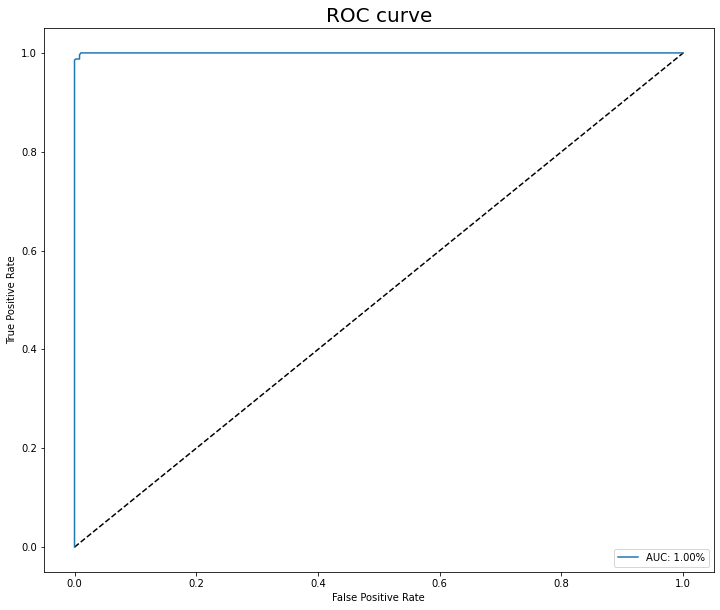

In [265]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(12,10))
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr, label=f'AUC: {auc_score:.2f}%')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve', fontsize= 20)
plt.legend(loc ='lower right')
plt.show()

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# create a Random Forest classifier
rf = RandomForestClassifier()

# perform 10-fold cross-validation
scores = cross_val_score(clf_balanced, X, y, cv=15, scoring = "accuracy")

# print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.02)


In [255]:
sklearn.metrics.get_scorer_names()

NameError: name 'sklearn' is not defined

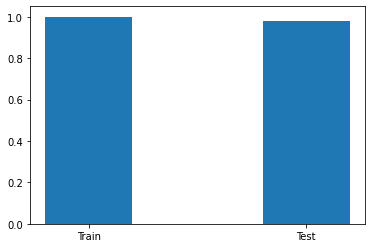

In [242]:
# Evaluate the model on the training and test sets
train_score = clf_balanced.score(X_train, y_train)
test_score = clf_balanced.score(X_test, y_test)

# Plot the results
x = np.arange(2)
plt.bar(x, [train_score, test_score], width=0.4)
plt.xticks(x, ['Train', 'Test'])
plt.show()

In [244]:
from sklearn.metrics import classification_report

# Generating y_pred values
y_pred = clf_balanced.predict(X_test)

# Target names
names = ['No Risk of Heart Disease', 'Risk of Heart Disease']
print(classification_report(y_test, y_pred, target_names=names))

                          precision    recall  f1-score   support

No Risk of Heart Disease       1.00      0.96      0.98       486
   Risk of Heart Disease       0.96      1.00      0.98       486

                accuracy                           0.98       972
               macro avg       0.98      0.98      0.98       972
            weighted avg       0.98      0.98      0.98       972



## Saving the model

In [245]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(clf_balanced, file)

In [246]:
# loading the saved model
saved_model = pickle.load(open('model.pkl', 'rb'))
score = saved_model.score(X_test, y_test)
score

0.9783950617283951

In [ ]:
y_pred = pipeline.predict(X_test)

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [58]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, 
                                                    test_size=0.2,
                                                    random_state=42)


clf = LogisticRegression()



random_grid ={
     'penalty' : ['l1', 'l2', 'elasticnet'],
    'max_iter' : range(100, 600),
    'warm_start' : [True, False],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag'],
    'C' : np.logspace(-1, 4, 20)
}



random_estimator = RandomizedSearchCV(estimator = clf,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, y_train)

score = random_estimator.score(X_test, y_test)
print(f'{score*100:.1f}%')
print(random_estimator.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
72.1%
{'warm_start': False, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 483, 'C': 12.742749857031335}


In [59]:
y_pred = random_estimator.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=random_estimator.classes_)
cnf_matrix

array([[368, 118],
       [153, 333]], dtype=int64)

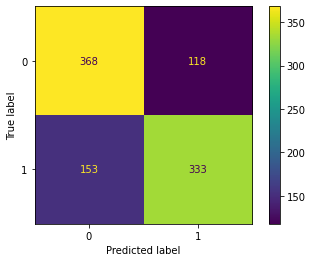

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                       display_labels = random_estimator.classes_)
disp.plot()
plt.show()

In [61]:
from sklearn.metrics import classification_report
target_names = ['No Risk of Heart Disease', 'Risk of Heart Disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

No Risk of Heart Disease       0.71      0.76      0.73       486
   Risk of Heart Disease       0.74      0.69      0.71       486

                accuracy                           0.72       972
               macro avg       0.72      0.72      0.72       972
            weighted avg       0.72      0.72      0.72       972



In [62]:
pip install imblearn



[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
a = [10, 23, 25, 45, [...]]
print(a[-1]*2)

[Ellipsis, Ellipsis]


In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the hyperparameters you want to tune
param_dist = {
  'max_depth': np.arange(2, 30),
  'min_samples_leaf': np.arange(1, 10),
  'min_samples_split': np.arange(2, 10),
  'criterion': ['gini', 'entropy']
}

# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create an instance of the RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters found by the RandomizedSearchCV
best_params = random_search.best_params_

# Use the best hyperparameters to create a new instance of the DecisionTreeClassifier
best_dt = DecisionTreeClassifier(**best_params)

# Fit the best decision tree classifier to your data
best_dt.fit(X_train, y_train)
score = best_dt.score(X_test, y_test)
print(score)

0.7973251028806584


In [65]:
def func():
    a,  *b,  c = ["Car", "Dog", "Tiger", "Lion"]
    item = b
    return "Lion" in [item] or None


print(func())

None


In [66]:
d = {1: 2, 3: 4}
print(d.get(1))
print(d.get(1, 0))
print(d.get(5, 0))
print(d.get(5))

2
2
0
None


In [67]:
d = {'a': 1, 'b': 2, 'c': 3}
d = {k for k in d.keys()}
print(d & {'b', 'c', 'd'})

{'b', 'c'}


In [68]:
d = {'a': 1, 'b': 2, 'c': 3, 'd': 2}
print(len(d.keys() & {'b', 'c', 'd'}))

3


In [216]:
def mystery_function(lst):
    for i in range(len(lst)):
        lst[i] = lst[i] * 2
    return [x for x in lst if x % 3 == 0]

print(mystery_function([1, 2, 3, 4, 5, 6]))

[6, 12]


In [270]:
def mystery_function(lst):
    for i in range(len(lst)):
        lst[i] = lst[i] * 2
    return lst

print(mystery_function([1, 2, 3, 4, 5, 6]))

[2, 4, 6, 8, 10, 12]


In [271]:

double = []
for num in x:
    double.append(num *2)
    
print(double)

[2, 4, 6, 8, 10, 12]


In [272]:
x = [1, 2, 3, 4, 5, 6]
ds = [num*2 for num in x ]
ds

[2, 4, 6, 8, 10, 12]

In [227]:
word = "Valentine"

# Remove duplicates using the set function
unique_letters = set(word)
valentine_id = ""
for letter in unique_letters:
    ascii_code = ord(letter)
    valentine_id += str(ascii_code)

print("Valentine's Day ID: " + valentine_id)

Valentine's Day ID: 1051109786116101108


In [226]:
word = "Valentine"
unique_letters = []
for letter in word:
    if word.count(letter):
        if letter not in unique_letters:
            unique_letters.append(letter)
valentine_id = ""
for letter in unique_letters:
    ascii_code = ord(letter)
    valentine_id += str(ascii_code)

print(valentine_id)
    

8697108101110116105


In [225]:
a = "8697108101110116105"


word = []
for i in a:
    word.append(chr(int(i)))
print(word)
    

['\x08', '\x06', '\t', '\x07', '\x01', '\x00', '\x08', '\x01', '\x00', '\x01', '\x01', '\x01', '\x00', '\x01', '\x01', '\x06', '\x01', '\x00', '\x05']
